In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные датасета для «Прогноза популярности статьи на Хабре».

In [2]:
url = 'https://raw.githubusercontent.com/miptgirl/habra_materials/master/prophet/howpop_train.csv'
df = pd.read_csv(url)
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm`. Выберем их с помощью `filter()` и удалим drop-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include = ['object', 'bool']).T # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/post/251676/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [10]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [11]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [12]:
df.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18


Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос. Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но я советую Вам потренироваться строить (красивые) визуализации.

## 1. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

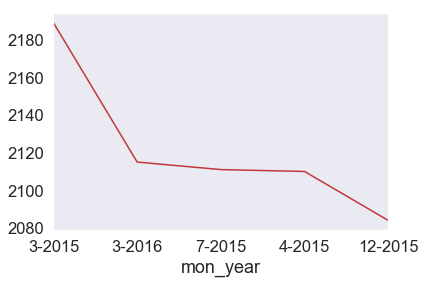

In [15]:
df['mon_year'] = [(str(d.month) + '-' + str(d.year)) for d in df.published]
df.groupby(['mon_year'])['mon_year'].count().sort_values(ascending=False).head().plot()
# в марте 2015 больше всего публикаций

## 2. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре всегда больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


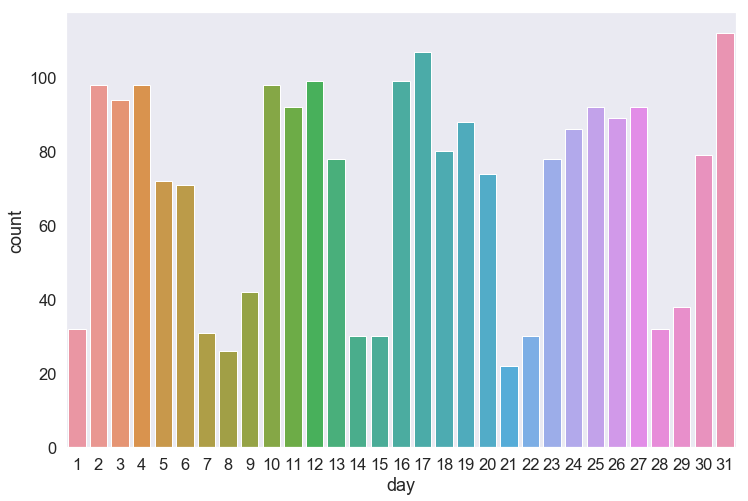

In [17]:
df_mon = df[df.mon_year == '3-2015']
df_mon['day'] = [p.day for p in df_mon.published]
fig = plt.figure(figsize=(12,8))
sns.countplot(x = 'day', data = df_mon)

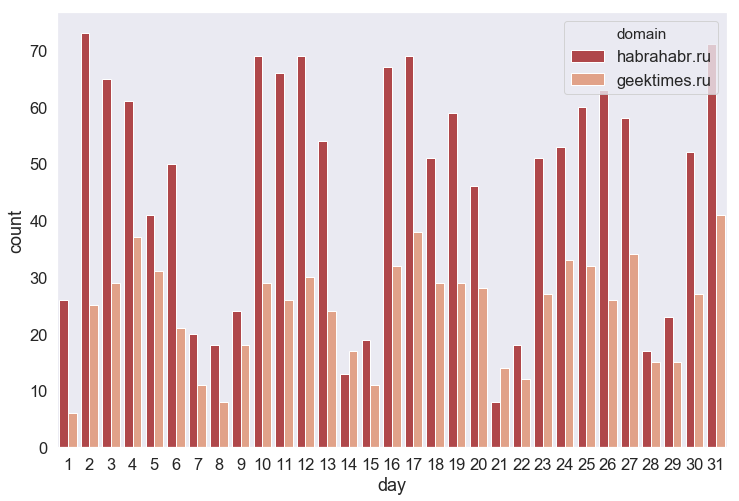

In [18]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x = 'day', hue = 'domain', data = df_mon) 
# есть два дня когда гиктаймсе статей больше

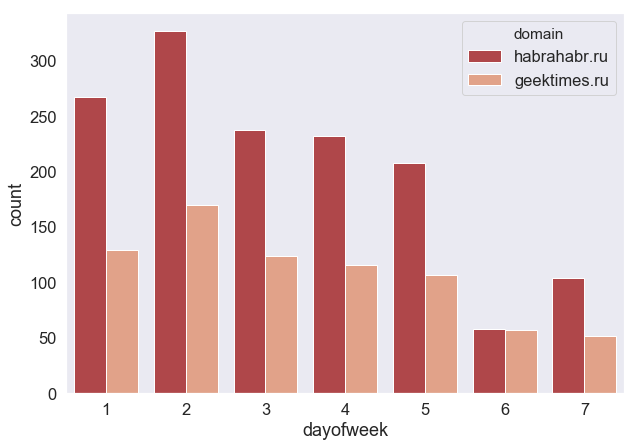

In [19]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x = 'dayofweek', hue = 'domain', data = df_mon) 
# да, в субботу публикуют почти одинаковое количество статей

## 3. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

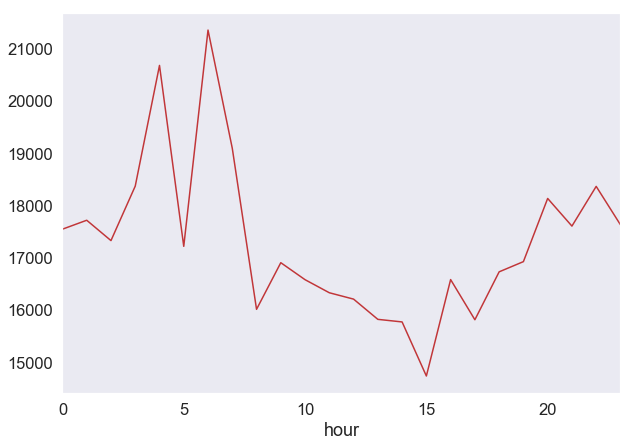

In [46]:
fig = plt.figure(figsize=(10,7))
df.groupby('hour')['views'].mean().plot() 
# Больше всего просмотров набирают статьи, опубликованные в 6 часов утра

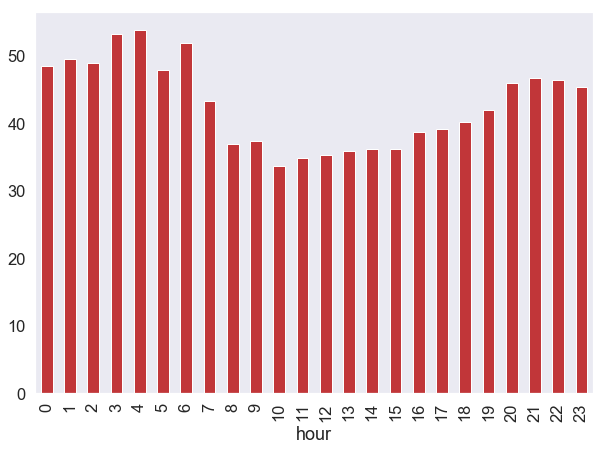

In [55]:
fig = plt.figure(figsize=(10,7))
df.groupby('hour')['comments'].mean().plot(kind='bar')

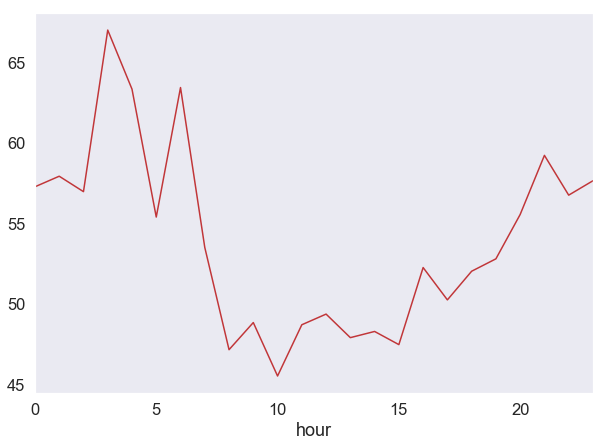

In [45]:
fig = plt.figure(figsize=(10,7))
df[df.domain == 'geektimes.ru'].groupby('hour')['comments'].mean().plot()

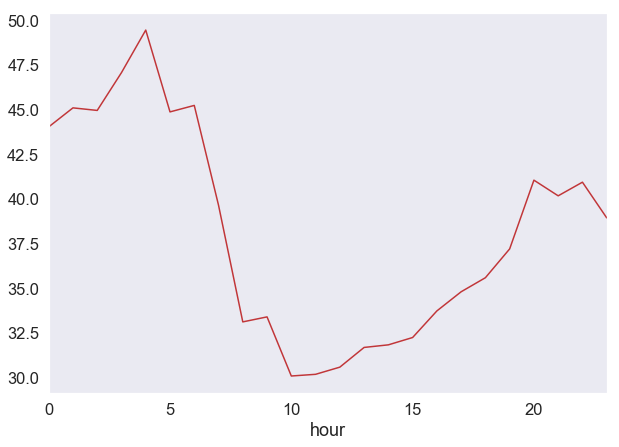

In [44]:
fig = plt.figure(figsize=(10,7))
df[df.domain == 'habrahabr.ru'].groupby('hour')['comments'].mean().plot()

## 4. Кого из топ-20 авторов чаще всего минусуют?¶

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

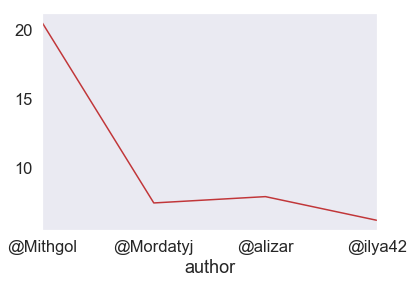

In [57]:
top_authors = ['@Mordatyj','@Mithgol', '@alizar', '@ilya42']
df[df.author.isin(top_authors)].groupby('author')['votes_minus'].mean().plot()

## 5. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

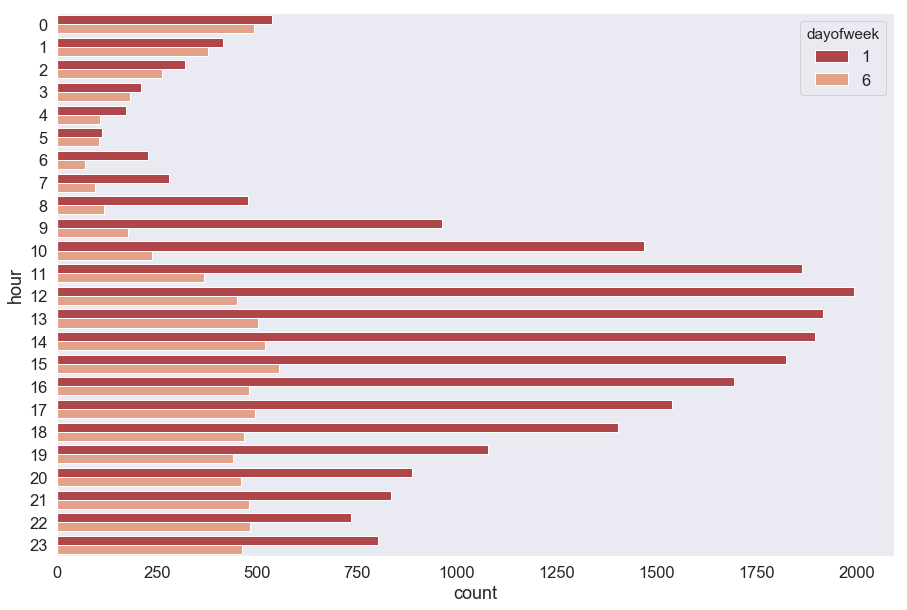

In [68]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y = 'hour', hue = 'dayofweek', data = df[df.dayofweek.isin([1, 6])])
# по субботам авторы пишут в основном днём и вечером, а по понедельникам — в основном днем